In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd 

In [2]:
lol_champions = pd.read_csv("data/LoL_champions.csv",header=0)

lol_champions.head()

# num_clusters = 4

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


In [3]:
lol_champions_cn = pd.read_csv("data/英雄.csv",header=0)

lol_champions_cn.head()

,英雄名字,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,幻翎 洛,510.0,5.0,315.0,8.75,335,300,62.0,0.625,24.0,30.0
1,逆羽 霞,545.0,6.0,340.0,8.25,325,525,56.0,0.625,24.0,30.0
2,青钢影 卡蜜尔,575.0,8.5,338.0,8.15,340,125,60.0,0.625,26.0,32.1
3,翠神 艾翁,580.0,6.9,450.0,6.00,325,125,50.0,0.644,22.0,32.1
4,暴怒骑士 克烈,340.0,6.0,100.0,0.00,345,125,55.0,0.625,26.0,32.1


In [76]:
#exploratory data analysis (EDA)
lol_champions_cn

,英雄名字,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,幻翎 洛,510.00,5.000,315.0,8.750,335,300,62.00,0.625,24.000,30.0
1,逆羽 霞,545.00,6.000,340.0,8.250,325,525,56.00,0.625,24.000,30.0
2,青钢影 卡蜜尔,575.00,8.500,338.0,8.150,340,125,60.00,0.625,26.000,32.1
3,翠神 艾翁,580.00,6.900,450.0,6.000,325,125,50.00,0.644,22.000,32.1
4,暴怒骑士 克烈,340.00,6.000,100.0,0.000,345,125,55.00,0.625,26.000,32.1
...,...,...,...,...,...,...,...,...,...,...,...
131,时光守护者 基兰,499.00,5.440,360.0,8.500,335,550,51.64,0.625,19.134,30.0
132,祖安狂人 蒙多医生,582.52,7.760,0.0,0.000,345,125,61.27,0.625,26.880,32.1
133,迅捷斥候 提莫,515.00,5.742,267.0,7.206,330,500,49.54,0.690,24.300,30.0
134,黑暗之女 安妮,511.00,5.424,334.0,6.000,335,575,50.41,0.579,19.220,30.0


In [16]:
lol_champions_cn.describe()

,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,548.680588,6.886794,285.934118,7.893632,336.455882,318.419118,55.887776,0.638522,23.968559,31.046324
std,39.763519,1.376174,101.213414,8.674620,7.974838,196.956192,4.094765,0.025803,3.068106,1.050355
min,340.000000,2.500000,0.000000,0.000000,325.000000,125.000000,40.368000,0.481000,16.000000,30.000000
25%,521.750000,5.708000,271.600000,6.000000,330.000000,125.000000,53.504000,0.625000,21.880000,30.000000
50%,550.000000,6.912000,308.500000,7.000000,335.000000,175.000000,55.940000,0.625000,24.074000,31.000000
75%,580.000000,8.012000,350.000000,8.002000,345.000000,525.000000,59.187000,0.658000,26.380000,32.100000
max,625.000000,10.180000,450.000000,50.000000,355.000000,650.000000,63.544000,0.694000,31.384000,32.100000


In [18]:
#Method 1: Using idxmax() to Get the Row Index of the Max Value
column_name = '生命值回复'

max_index = lol_champions_cn.iloc[:,1].idxmax()

row_with_max = lol_champions_cn.loc[max_index]

print(f"Maximum value in '{column_name}': {lol_champions_cn[column_name].max()}")
print("\nEntire row with the maximum value:")
print(row_with_max)

Maximum value in '生命值回复': 10.18

Entire row with the maximum value:
英雄名字     蛮族之王 泰达米尔
生命值          625.0
生命值回复        8.512
魔法值          100.0
魔法值回复          0.0
移动速度           345
攻击范围           125
攻击力         61.376
攻击速度          0.67
护甲          24.108
魔法抗性          32.1
Name: 113, dtype: object


In [19]:
# Method 2: Using nlargest(1) to Directly Get the Row
# Use nlargest to get the row with the maximum value in 'Score'
column_name = '生命值'

row_with_max = lol_champions_cn.nlargest(2, column_name)

print("\nUsing nlargest(1):")
print(row_with_max)


Using nlargest(1):
          英雄名字     生命值  生命值回复    魔法值  魔法值回复  移动速度  攻击范围     攻击力  攻击速度      护甲  \
113  蛮族之王 泰达米尔  625.00  8.512  100.0  0.000   345   125  61.376  0.67  24.108   
72   巨魔之王 特朗德尔  616.28  6.000  281.6  7.508   350   175  60.040  0.67  27.536   

     魔法抗性  
113  32.1  
72   32.1  


In [21]:
column_name = '魔法值'

# Find all rows where 'Score' equals the maximum value
max_value = lol_champions_cn[column_name].max()
all_max_rows = lol_champions_cn[lol_champions_cn[column_name] == max_value]

print("\nAll rows with maximum value in 'Score':")
print(all_max_rows)


All rows with maximum value in 'Score':
    英雄名字    生命值  生命值回复    魔法值  魔法值回复  移动速度  攻击范围   攻击力   攻击速度    护甲  魔法抗性
3  翠神 艾翁  580.0    6.9  450.0    6.0   325   125  50.0  0.644  22.0  32.1


In [32]:
#Method 1: Using nlargest() and nsmallest() for Each Column
df = pd.DataFrame()

In [37]:
def get_top_bottom_values(df):
    result = []
    for col in df.columns:
        print(col)
        # Get top 2 max values (with their original indices, if needed)
        row_with_max = lol_champions_cn.nlargest(2, col)
        print("\nUsing nlargest(2):")
        print(row_with_max)
        
        max_values = df[col].nlargest(2).reset_index(drop=True)  # Reset index to ignore original positions
        #print(max_values)
        
        # Get bottom 2 min values
        row_with_min = lol_champions_cn.nsmallest(2, col)
        print("\nUsing nsmallest(2):")
        print(row_with_min)
        
        min_values = df[col].nsmallest(2).reset_index(drop=True)
        #print(min_values)
        # Combine into a single Series with labels for max/min ranks
        combined = pd.concat([
            pd.Series(max_values, index=['max1', 'max2']),
            pd.Series(min_values, index=['min1', 'min2'])
        ])
        print(combined)
        result.append(combined)
    # Stack results into a DataFrame (columns = original columns, rows = max/min ranks)
    return pd.DataFrame(result, index=df.columns).T

In [38]:
top_bottom_df = get_top_bottom_values(lol_champions_cn.iloc[:,1:])
print("\nTop 2 Max and Bottom 2 Min Values for Each Column:\n", top_bottom_df)

生命值

Using nlargest(2):
          英雄名字     生命值  生命值回复    魔法值  魔法值回复  移动速度  攻击范围     攻击力  攻击速度      护甲  \
113  蛮族之王 泰达米尔  625.00  8.512  100.0  0.000   345   125  61.376  0.67  24.108   
72   巨魔之王 特朗德尔  616.28  6.000  281.6  7.508   350   175  60.040  0.67  27.536   

     魔法抗性  
113  32.1  
72   32.1  

Using nsmallest(2):
          英雄名字    生命值  生命值回复    魔法值  魔法值回复  移动速度  攻击范围     攻击力   攻击速度     护甲  \
4      暴怒骑士 克烈  340.0  6.000  100.0    0.0   345   125  55.000  0.625  26.00   
109  冰晶凤凰 艾尼维亚  467.0  5.574  396.0    6.0   325   600  51.376  0.625  21.22   

     魔法抗性  
4    32.1  
109  30.0  
max1   NaN
max2   NaN
min1   NaN
min2   NaN
Name: 生命值, dtype: float64
生命值回复

Using nlargest(2):
            英雄名字    生命值   生命值回复    魔法值  魔法值回复  移动速度  攻击范围    攻击力   攻击速度  \
123      亡灵战神 赛恩  542.0  10.180  325.0  8.008   345   175  59.72  0.679   
38   诺克萨斯之手 德莱厄斯  582.0   9.846  263.0  6.588   340   175  56.00  0.625   

        护甲  魔法抗性  
123  23.04  32.1  
38   30.00  32.1  

Using nsmallest(2)

In [23]:
lol_champions_cn.iloc[:,1:]

,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
0,510.00,5.000,315.0,8.750,335,300,62.00,0.625,24.000,30.0
1,545.00,6.000,340.0,8.250,325,525,56.00,0.625,24.000,30.0
2,575.00,8.500,338.0,8.150,340,125,60.00,0.625,26.000,32.1
3,580.00,6.900,450.0,6.000,325,125,50.00,0.644,22.000,32.1
4,340.00,6.000,100.0,0.000,345,125,55.00,0.625,26.000,32.1
...,...,...,...,...,...,...,...,...,...,...
131,499.00,5.440,360.0,8.500,335,550,51.64,0.625,19.134,30.0
132,582.52,7.760,0.0,0.000,345,125,61.27,0.625,26.880,32.1
133,515.00,5.742,267.0,7.206,330,500,49.54,0.690,24.300,30.0
134,511.00,5.424,334.0,6.000,335,575,50.41,0.579,19.220,30.0


In [ ]:
top_bottom_df = get_top_bottom_values(df)
print("\nTop 2 Max and Bottom 2 Min Values for Each Column:\n", top_bottom_df)

In [25]:
# Method 2: Using apply() for a More Concise Approach
# Get top 2 max and bottom 2 min for all columns
max_values = lol_champions_cn.iloc[:,1:].apply(lambda x: x.nlargest(2), axis=0)
min_values = lol_champions_cn.iloc[:,1:].apply(lambda x: x.nsmallest(2), axis=0)

max_values

,生命值,生命值回复,魔法值,魔法值回复,移动速度,攻击范围,攻击力,攻击速度,护甲,魔法抗性
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1
3,NaN,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN,32.1
14,NaN,NaN,NaN,NaN,NaN,NaN,63.000,NaN,NaN,NaN
29,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,9.846,NaN,NaN,NaN,NaN,NaN,NaN,30.000,NaN
41,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,63.544,0.694,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,650.0,NaN,NaN,NaN,NaN
72,616.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694,NaN,NaN


In [10]:
base_hp = lol_champions_cn.iloc[:,1]

In [15]:
base_hp.describe()

count    136.000000
mean     548.680588
std       39.763519
min      340.000000
25%      521.750000
50%      550.000000
75%      580.000000
max      625.000000
Name: 生命值, dtype: float64

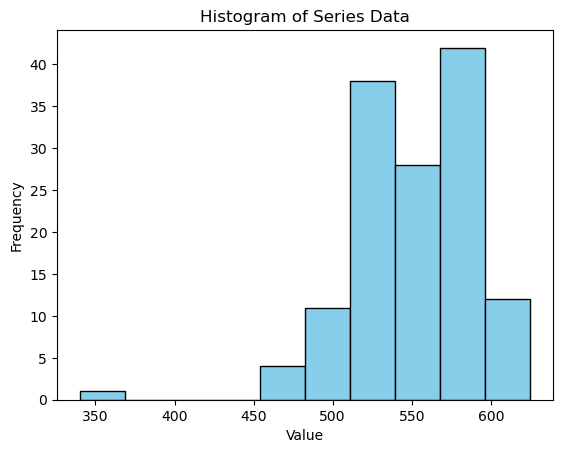

In [11]:
# Method 1: Using Pandas' built - in plotting (simple and convenient for basic cases)
base_hp.plot.hist(bins=10,  # Number of bins (bars) in the histogram
               color='skyblue',  # Color of the bars
               edgecolor='black')  # Color of the edges of the bars

# Add labels and title (using Matplotlib functions since Pandas plotting is based on Matplotlib)
import matplotlib.pyplot as plt
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Series Data')
plt.show()

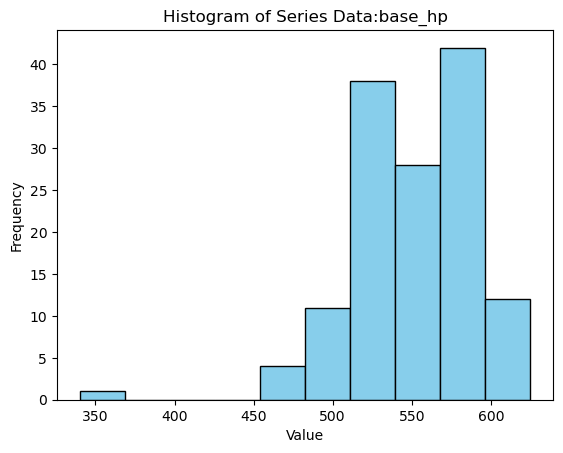

In [39]:
# Method 2: Using Matplotlib directly (more control over details)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot the histogram using Matplotlib
plt.hist(base_hp.values,  # Pass the values of the Series as a NumPy array
         bins=10,
         color='skyblue',
         edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Series Data:base_hp')
plt.show()

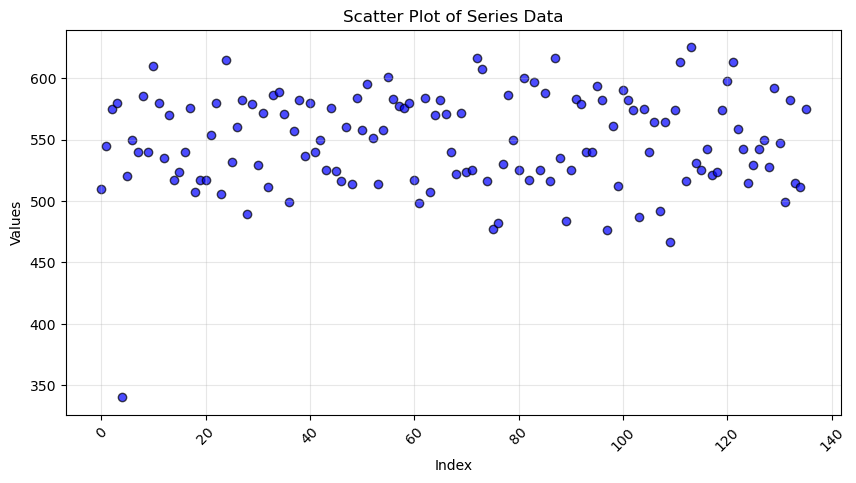

In [13]:
#Case 1: Scatter Plot (Index vs. Values)

import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample Series (e.g., random values with a datetime index)
# index = pd.date_range(start="2023-01-01", periods=30, freq="D")
# data = pd.Series(np.random.randn(30), index=index)

# Plot as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x=base_hp.index, y=base_hp.values, color="blue", alpha=0.7, edgecolor="black")  # alpha for transparency
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot of Series Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (if index is text/datetime)
plt.grid(True, alpha=0.3)
plt.show()

In [75]:
import matplotlib
print(matplotlib.get_cachedir())

import matplotlib.font_manager as fm

# fonts = fm.fontManager.ttflist
# for font in fonts:
#     print(font.name)
    
plt.rcParams['font.sans-serif'] = ['Hei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

/Users/james/.matplotlib


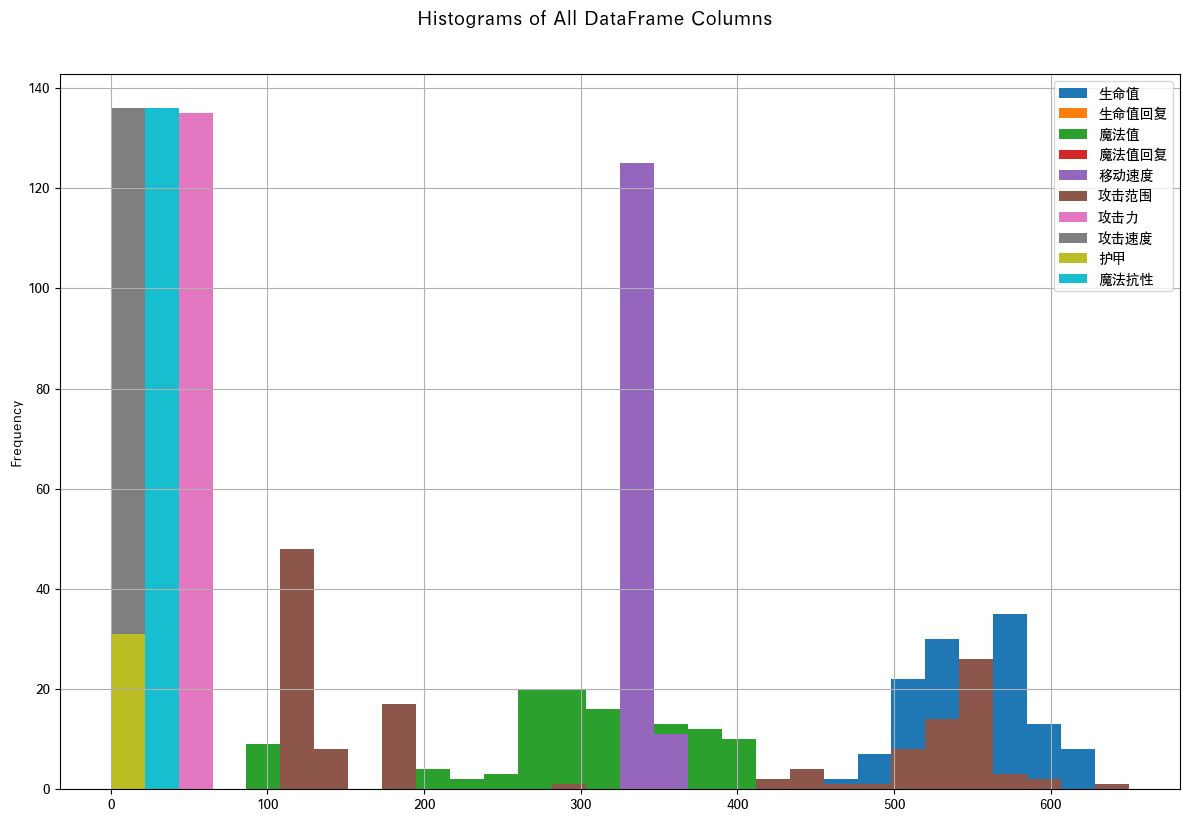

In [49]:
#Method 1: Using Pandas + Matplotlib (Simple Subplots)

lol_champions_cn_v=lol_champions_cn.iloc[:,1:]
# Plot histograms for all columns
lol_champions_cn_v.plot.hist(
    bins=30,        # Number of bins per histogram
    figsize=(12, 8), # Size of the figure
    grid=True,      # Show grid lines
    layout=(5, 2),   # Arrange subplots in 2 rows and 2 columns (adjust for your column count)
    sharex=False    # Let each plot have its own x-axis
)

# Add a super title and adjust spacing
plt.suptitle('Histograms of All DataFrame Columns', y=1.02, fontsize=14)
plt.tight_layout()  # Prevent overlapping labels
plt.show()

[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: >]


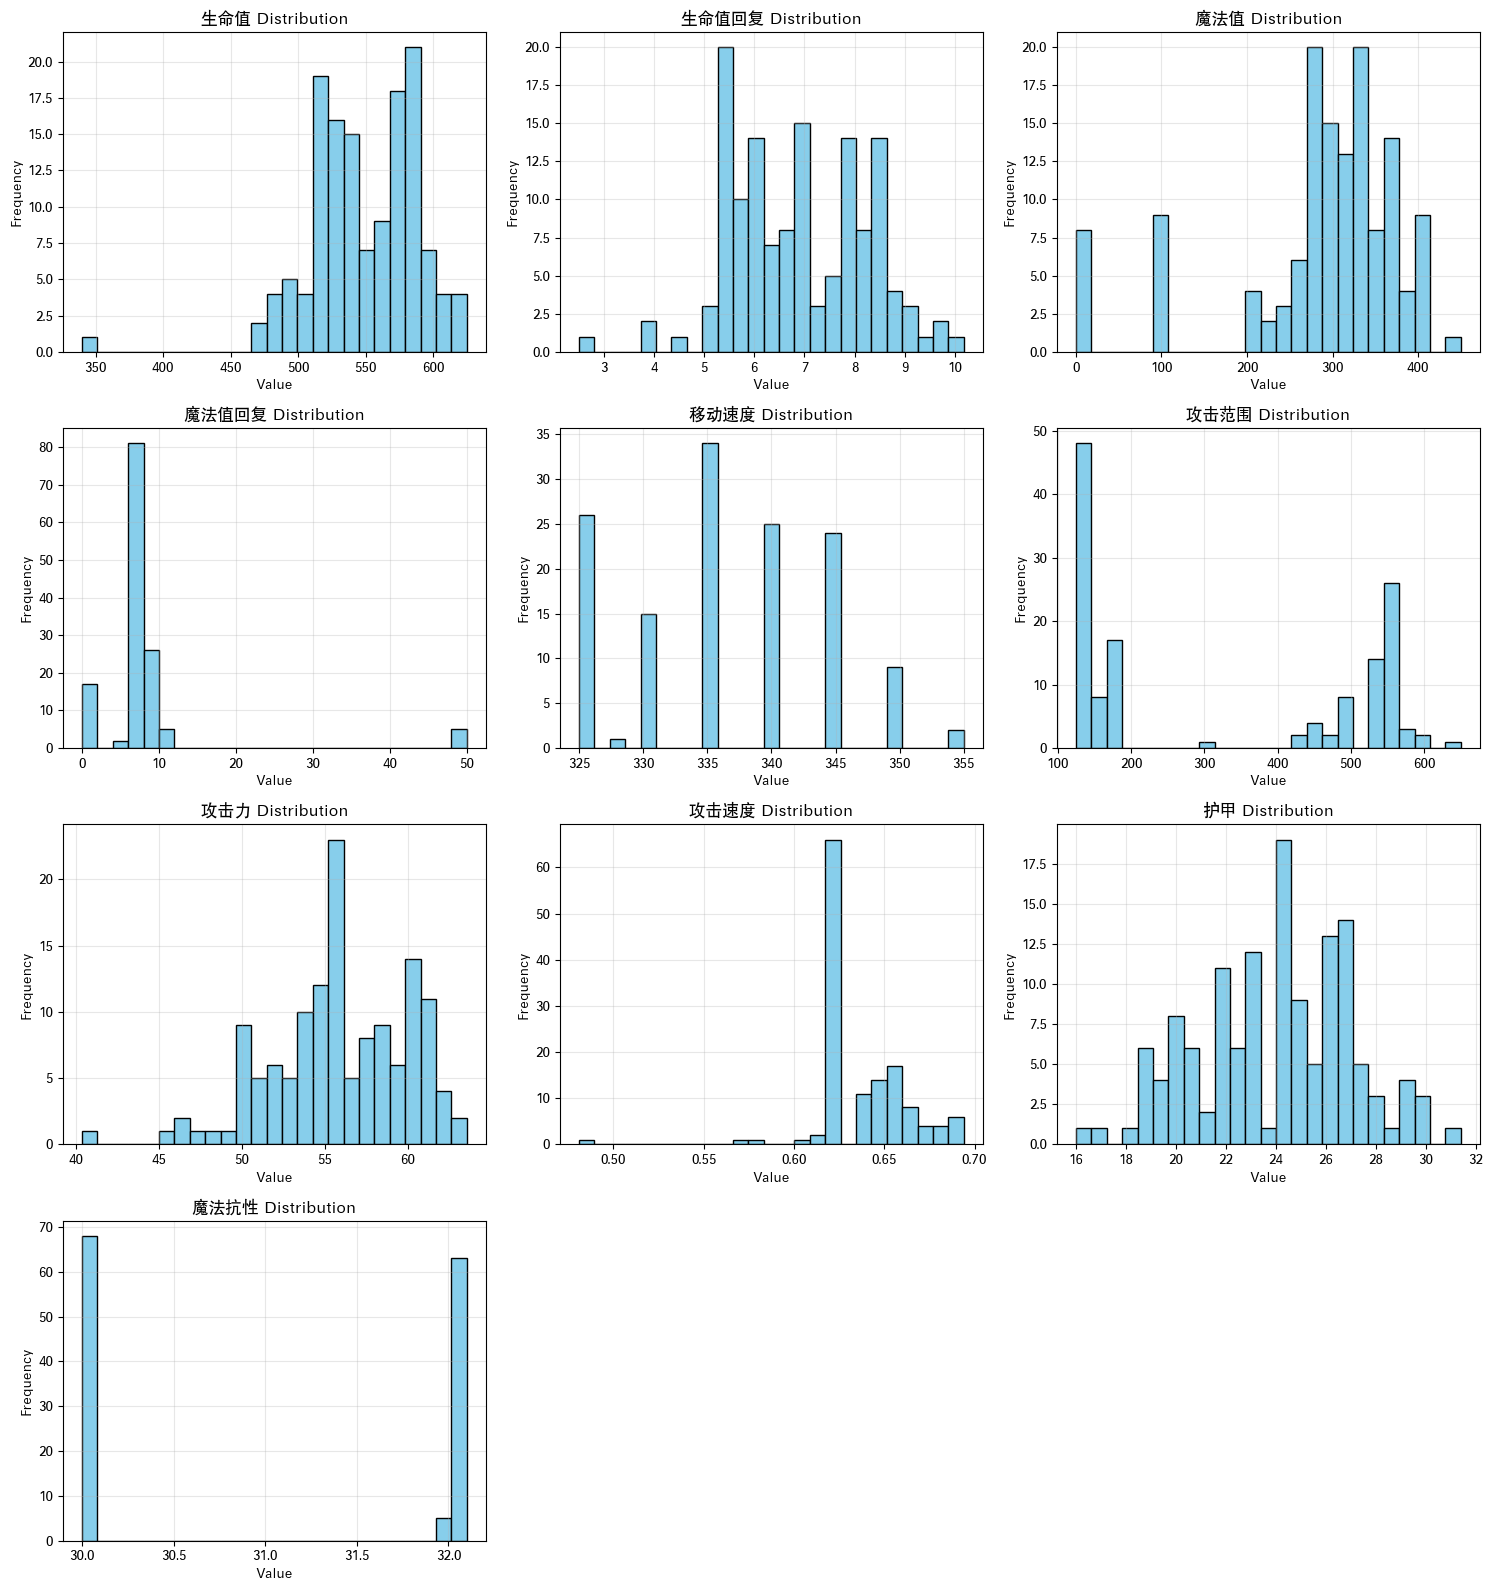

In [74]:
#Method 2: Using Matplotlib Directly (More Customization)
import numpy as np
import matplotlib.pyplot as plt

# Set up subplots
n_cols = lol_champions_cn_v.shape[1]

# 计算合适的子图行数和列数（例如：每行最多显示 3 列，避免横向过长）
n_rows = (n_cols + 2) // 3  # 向上取整，确保列数能被行数整除
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, 4 * n_rows))  # 动态调整高度

print(axes)

# 处理子图为一维数组（适用于列数不足 n_rows*3 的情况）
axes = axes.flatten()  # 将二维数组展平为一维，方便循环遍历
print(axes)

# Plot histograms for each column
for i, col in enumerate(lol_champions_cn_v.columns):
    ax = axes[i]
    ax.hist(lol_champions_cn_v[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

# 隐藏多余的子图（如果列数不足 n_rows*3）
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Adjust spacing and display
plt.tight_layout()
plt.show()


<Axes: >

<Figure size 640x480 with 0 Axes>

In [ ]:
#Method 4: Plotting Categorical Columns (Optional)